In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, recall_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv(r'C:\Users\Akami\Desktop\DataScience\данные\train_dataset_train.csv')

In [3]:
df

,id,area,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-04-30,nd_mean_2021-05-01,...,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-03,nd_mean_2021-06-02,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-05-24,crop
0,1612,40,0.159413,0.251090,0.288860,0.039673,0.301931,0.000000,0.274627,0.079860,...,0.760103,0.413159,0.000000,0.169458,0.568205,0.362157,0.380075,0.360077,0.552304,5
1,978,75,0.231795,0.260749,0.304190,0.483102,0.213664,0.190464,0.342645,0.000000,...,0.119815,0.339988,0.145459,0.000000,0.013604,0.258762,0.271984,0.000000,0.302597,0
2,3050,75,0.000000,0.176574,0.000000,0.291817,0.352851,0.024589,0.000000,0.345859,...,0.305729,0.000000,0.023593,0.149080,0.000000,0.158617,0.419407,0.046266,0.215719,6
3,4960,55,0.000000,0.317001,0.267246,0.000000,0.265689,0.038065,0.000000,0.533367,...,0.129912,0.588483,0.020564,0.073617,0.804204,0.820184,0.018503,0.807123,0.202017,1
4,2548,25,0.083827,0.000000,0.167003,0.308370,0.150439,0.179282,0.192157,0.328494,...,0.015783,0.143457,0.215363,0.101592,0.068873,0.190155,0.068211,0.379317,0.275945,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,3772,42,0.131572,0.081907,0.073889,0.317510,0.165548,0.507076,0.048655,0.564173,...,0.000000,0.407002,0.503186,0.364279,0.332148,0.000000,0.405480,0.120228,0.000000,4
4894,5191,49,0.293811,0.089474,0.319521,0.344790,0.227012,0.135769,0.000000,0.307748,...,0.831953,0.131615,0.561324,0.000000,0.204482,0.014390,0.000000,0.218073,0.544207,5
4895,5226,112,0.228881,0.164020,0.255234,0.281279,0.239497,0.327619,0.329451,0.000000,...,0.712775,0.513491,0.522654,0.044539,0.478726,0.452189,0.569747,0.354022,0.515387,5
4896,5390,83,0.519728,0.101464,0.000000,0.169826,0.263588,0.490774,0.227280,0.304209,...,0.000000,0.144281,0.186376,0.099750,0.101147,0.015941,0.075777,0.714573,0.217420,1


In [4]:
df = df.drop(['id','area','.geo'], axis=1)

In [5]:
df

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-04-30,nd_mean_2021-05-01,nd_mean_2021-05-02,nd_mean_2021-05-08,...,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-03,nd_mean_2021-06-02,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-05-24,crop
0,0.159413,0.251090,0.288860,0.039673,0.301931,0.000000,0.274627,0.079860,0.142140,0.541932,...,0.760103,0.413159,0.000000,0.169458,0.568205,0.362157,0.380075,0.360077,0.552304,5
1,0.231795,0.260749,0.304190,0.483102,0.213664,0.190464,0.342645,0.000000,0.396637,0.386678,...,0.119815,0.339988,0.145459,0.000000,0.013604,0.258762,0.271984,0.000000,0.302597,0
2,0.000000,0.176574,0.000000,0.291817,0.352851,0.024589,0.000000,0.345859,0.145083,0.018497,...,0.305729,0.000000,0.023593,0.149080,0.000000,0.158617,0.419407,0.046266,0.215719,6
3,0.000000,0.317001,0.267246,0.000000,0.265689,0.038065,0.000000,0.533367,0.276083,0.294761,...,0.129912,0.588483,0.020564,0.073617,0.804204,0.820184,0.018503,0.807123,0.202017,1
4,0.083827,0.000000,0.167003,0.308370,0.150439,0.179282,0.192157,0.328494,0.132613,0.150841,...,0.015783,0.143457,0.215363,0.101592,0.068873,0.190155,0.068211,0.379317,0.275945,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.131572,0.081907,0.073889,0.317510,0.165548,0.507076,0.048655,0.564173,0.146965,0.045541,...,0.000000,0.407002,0.503186,0.364279,0.332148,0.000000,0.405480,0.120228,0.000000,4
4894,0.293811,0.089474,0.319521,0.344790,0.227012,0.135769,0.000000,0.307748,0.260934,0.328115,...,0.831953,0.131615,0.561324,0.000000,0.204482,0.014390,0.000000,0.218073,0.544207,5
4895,0.228881,0.164020,0.255234,0.281279,0.239497,0.327619,0.329451,0.000000,0.282913,0.283205,...,0.712775,0.513491,0.522654,0.044539,0.478726,0.452189,0.569747,0.354022,0.515387,5
4896,0.519728,0.101464,0.000000,0.169826,0.263588,0.490774,0.227280,0.304209,0.228270,0.092260,...,0.000000,0.144281,0.186376,0.099750,0.101147,0.015941,0.075777,0.714573,0.217420,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 71 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nd_mean_2021-04-15  4898 non-null   float64
 1   nd_mean_2021-04-16  4898 non-null   float64
 2   nd_mean_2021-04-18  4898 non-null   float64
 3   nd_mean_2021-04-22  4898 non-null   float64
 4   nd_mean_2021-04-26  4898 non-null   float64
 5   nd_mean_2021-04-28  4898 non-null   float64
 6   nd_mean_2021-04-30  4898 non-null   float64
 7   nd_mean_2021-05-01  4898 non-null   float64
 8   nd_mean_2021-05-02  4898 non-null   float64
 9   nd_mean_2021-05-08  4898 non-null   float64
 10  nd_mean_2021-05-15  4898 non-null   float64
 11  nd_mean_2021-05-16  4898 non-null   float64
 12  nd_mean_2021-05-17  4898 non-null   float64
 13  nd_mean_2021-05-26  4898 non-null   float64
 14  nd_mean_2021-05-27  4898 non-null   float64
 15  nd_mean_2021-05-29  4898 non-null   float64
 16  nd_mea

In [7]:
df.shape

(4898, 71)

In [8]:
df['crop'] = df['crop'].replace({0:99});

In [9]:
for col in df.columns:
    df[col] = df[col].replace({0:np.NaN})
df['crop'] = df['crop'].replace({99:0})
df.head(25)

#def nonefinct():
 #   return pd.None

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-04-30,nd_mean_2021-05-01,nd_mean_2021-05-02,nd_mean_2021-05-08,...,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-03,nd_mean_2021-06-02,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-05-24,crop
0,0.159413,0.251090,0.288860,0.039673,0.301931,NaN,0.274627,0.079860,0.142140,0.541932,...,0.760103,0.413159,NaN,0.169458,0.568205,0.362157,0.380075,0.360077,0.552304,5
1,0.231795,0.260749,0.304190,0.483102,0.213664,0.190464,0.342645,NaN,0.396637,0.386678,...,0.119815,0.339988,0.145459,NaN,0.013604,0.258762,0.271984,NaN,0.302597,0
2,NaN,0.176574,NaN,0.291817,0.352851,0.024589,NaN,0.345859,0.145083,0.018497,...,0.305729,NaN,0.023593,0.149080,NaN,0.158617,0.419407,0.046266,0.215719,6
3,NaN,0.317001,0.267246,NaN,0.265689,0.038065,NaN,0.533367,0.276083,0.294761,...,0.129912,0.588483,0.020564,0.073617,0.804204,0.820184,0.018503,0.807123,0.202017,1
4,0.083827,NaN,0.167003,0.308370,0.150439,0.179282,0.192157,0.328494,0.132613,0.150841,...,0.015783,0.143457,0.215363,0.101592,0.068873,0.190155,0.068211,0.379317,0.275945,6
5,0.241369,0.049066,0.324676,0.443559,NaN,0.247497,0.538098,0.404122,NaN,0.142188,...,0.380800,0.013524,0.108280,0.165540,0.214067,0.253133,0.768801,0.746595,0.058007,1
6,0.067663,0.118228,0.278763,0.340970,0.281869,0.340965,0.359728,0.035065,0.349624,0.344888,...,0.441345,0.265998,0.069753,0.181163,NaN,NaN,0.030241,0.334782,0.220140,6
7,0.524390,0.063103,0.099948,0.270682,0.371771,0.108234,NaN,0.267258,0.043915,0.061403,...,0.561925,0.387788,0.025596,0.353038,0.040109,NaN,0.226218,0.596655,NaN,1
8,0.245858,0.074893,0.172996,0.220143,0.437022,0.396250,0.382864,0.410468,0.291064,0.180205,...,NaN,NaN,0.143373,0.041731,0.236266,0.070749,0.205685,0.437794,0.016837,2
9,0.246322,0.326255,0.329771,0.222942,0.467947,0.367571,0.429340,0.006830,0.587346,0.400833,...,0.047540,0.217077,0.468152,0.084653,0.175234,0.320148,0.165155,0.071214,0.165144,2


In [10]:
nulls = dict(df.isna().sum()*100/df.shape[0])
for k, v in nulls.items():
    if v !=0:
        print(k,v)

nd_mean_2021-04-15 12.249897917517353
nd_mean_2021-04-16 12.209064924458962
nd_mean_2021-04-18 11.923233973050225
nd_mean_2021-04-22 11.596570028583095
nd_mean_2021-04-26 10.473662719477337
nd_mean_2021-04-28 14.638628011433237
nd_mean_2021-04-30 14.985708452429563
nd_mean_2021-05-01 17.17027358105349
nd_mean_2021-05-02 13.270722743977133
nd_mean_2021-05-08 18.47692935892201
nd_mean_2021-05-15 10.636994691710903
nd_mean_2021-05-16 2.490812576561862
nd_mean_2021-05-17 4.920375663536137
nd_mean_2021-05-26 7.002858309514087
nd_mean_2021-05-27 5.757452021233156
nd_mean_2021-05-29 10.800326663944467
nd_mean_2021-06-07 14.781543487137608
nd_mean_2021-06-18 1.7558187015108206
nd_mean_2021-06-19 1.0208248264597795
nd_mean_2021-06-20 0.9595753368721928
nd_mean_2021-06-22 0.6737443854634545
nd_mean_2021-06-25 2.08248264597795
nd_mean_2021-06-27 8.47284605961617
nd_mean_2021-07-07 0.46957942017149856
nd_mean_2021-07-08 1.7558187015108206
nd_mean_2021-07-09 0.7758268681094325
nd_mean_2021-07-13 2.

In [11]:

df.groupby('crop').agg([np.mean])

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-04-30,nd_mean_2021-05-01,nd_mean_2021-05-02,nd_mean_2021-05-08,...,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-03,nd_mean_2021-06-02,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-05-24
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
crop,,,,,,,,,,,,,,,,,,,,,
0,0.218401,0.231275,0.217346,0.207737,0.246111,0.233257,0.250341,0.219098,0.263777,0.254407,...,0.209263,0.194169,0.199648,0.207056,0.203816,0.196784,0.198784,0.203423,0.196720,0.207503
1,0.209536,0.198701,0.200902,0.276289,0.183902,0.202177,0.240027,0.301108,0.191981,0.196702,...,0.205330,0.209689,0.204145,0.194626,0.237593,0.453479,0.489062,0.385717,0.438115,0.195775
2,0.207951,0.234157,0.187247,0.232395,0.279342,0.238979,0.191961,0.199973,0.266980,0.195943,...,0.193932,0.199297,0.190559,0.199471,0.212133,0.205153,0.198286,0.200650,0.204685,0.193937
3,0.230216,0.197756,0.248809,0.208492,0.200298,0.196670,0.190453,0.200781,0.195463,0.202364,...,0.376816,0.458319,0.433627,0.359600,0.192593,0.209386,0.206448,0.203188,0.195679,0.194121
4,0.212693,0.226836,0.219353,0.246472,0.235855,0.221846,0.254077,0.203580,0.256417,0.208203,...,0.211642,0.201367,0.206498,0.201136,0.201204,0.198937,0.196738,0.207754,0.213804,0.197154
5,0.253032,0.241061,0.267422,0.206054,0.221239,0.207436,0.221395,0.198122,0.230073,0.252585,...,0.429525,0.523457,0.205845,0.383116,0.202313,0.371423,0.204474,0.318863,0.310765,0.439264
6,0.195758,0.199394,0.201290,0.196856,0.234932,0.211092,0.202461,0.205555,0.265928,0.191744,...,0.209990,0.205105,0.204343,0.203487,0.203250,0.198754,0.199015,0.196813,0.301791,0.206378


In [12]:
imputer = KNNImputer(missing_values=np.nan, n_neighbors=3, weights='uniform', metric='nan_euclidean', copy=True, add_indicator=False)

In [13]:
imputer = SimpleImputer(strategy='median')

In [14]:
for el in df['crop'].unique():
    imputer.fit(df.loc[df['crop']==el])
    X = imputer.transform(df)
    df_n = pd.DataFrame(X, columns=df.columns, index=df.index)

In [15]:
df_n

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-04-30,nd_mean_2021-05-01,nd_mean_2021-05-02,nd_mean_2021-05-08,...,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-03,nd_mean_2021-06-02,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-05-24,crop
0,0.159413,0.251090,0.288860,0.039673,0.301931,0.209801,0.274627,0.079860,0.142140,0.541932,...,0.760103,0.413159,0.180788,0.169458,0.568205,0.362157,0.380075,0.360077,0.552304,5.0
1,0.231795,0.260749,0.304190,0.483102,0.213664,0.190464,0.342645,0.177204,0.396637,0.386678,...,0.119815,0.339988,0.145459,0.175406,0.013604,0.258762,0.271984,0.188617,0.302597,0.0
2,0.226281,0.176574,0.233107,0.291817,0.352851,0.024589,0.279397,0.345859,0.145083,0.018497,...,0.305729,0.181230,0.023593,0.149080,0.171566,0.158617,0.419407,0.046266,0.215719,6.0
3,0.226281,0.317001,0.267246,0.245421,0.265689,0.038065,0.279397,0.533367,0.276083,0.294761,...,0.129912,0.588483,0.020564,0.073617,0.804204,0.820184,0.018503,0.807123,0.202017,1.0
4,0.083827,0.247756,0.167003,0.308370,0.150439,0.179282,0.192157,0.328494,0.132613,0.150841,...,0.015783,0.143457,0.215363,0.101592,0.068873,0.190155,0.068211,0.379317,0.275945,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.131572,0.081907,0.073889,0.317510,0.165548,0.507076,0.048655,0.564173,0.146965,0.045541,...,0.184343,0.407002,0.503186,0.364279,0.332148,0.169011,0.405480,0.120228,0.174168,4.0
4894,0.293811,0.089474,0.319521,0.344790,0.227012,0.135769,0.279397,0.307748,0.260934,0.328115,...,0.831953,0.131615,0.561324,0.175406,0.204482,0.014390,0.178283,0.218073,0.544207,5.0
4895,0.228881,0.164020,0.255234,0.281279,0.239497,0.327619,0.329451,0.177204,0.282913,0.283205,...,0.712775,0.513491,0.522654,0.044539,0.478726,0.452189,0.569747,0.354022,0.515387,5.0
4896,0.519728,0.101464,0.233107,0.169826,0.263588,0.490774,0.227280,0.304209,0.228270,0.092260,...,0.184343,0.144281,0.186376,0.099750,0.101147,0.015941,0.075777,0.714573,0.217420,1.0


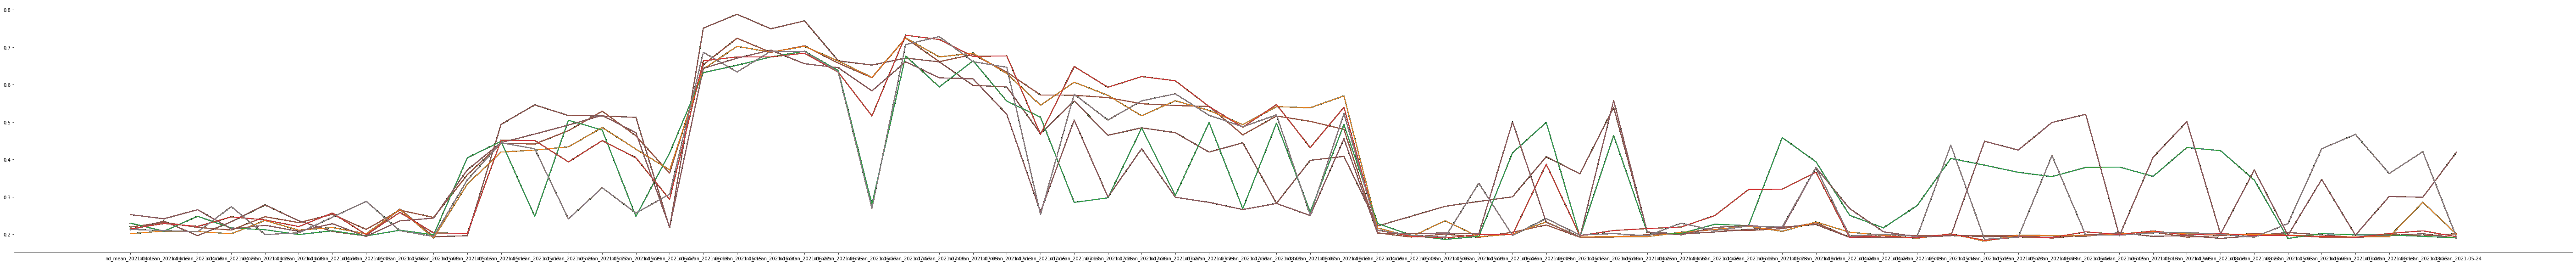

In [16]:
plt.figure(figsize=(100,10))
for cls in df_n['crop']:
    a = df_n.loc[df_n['crop']==cls].mean()[0:70]
    sns.lineplot(data=a, x=a.index, y=a.values)

Corr matrix 


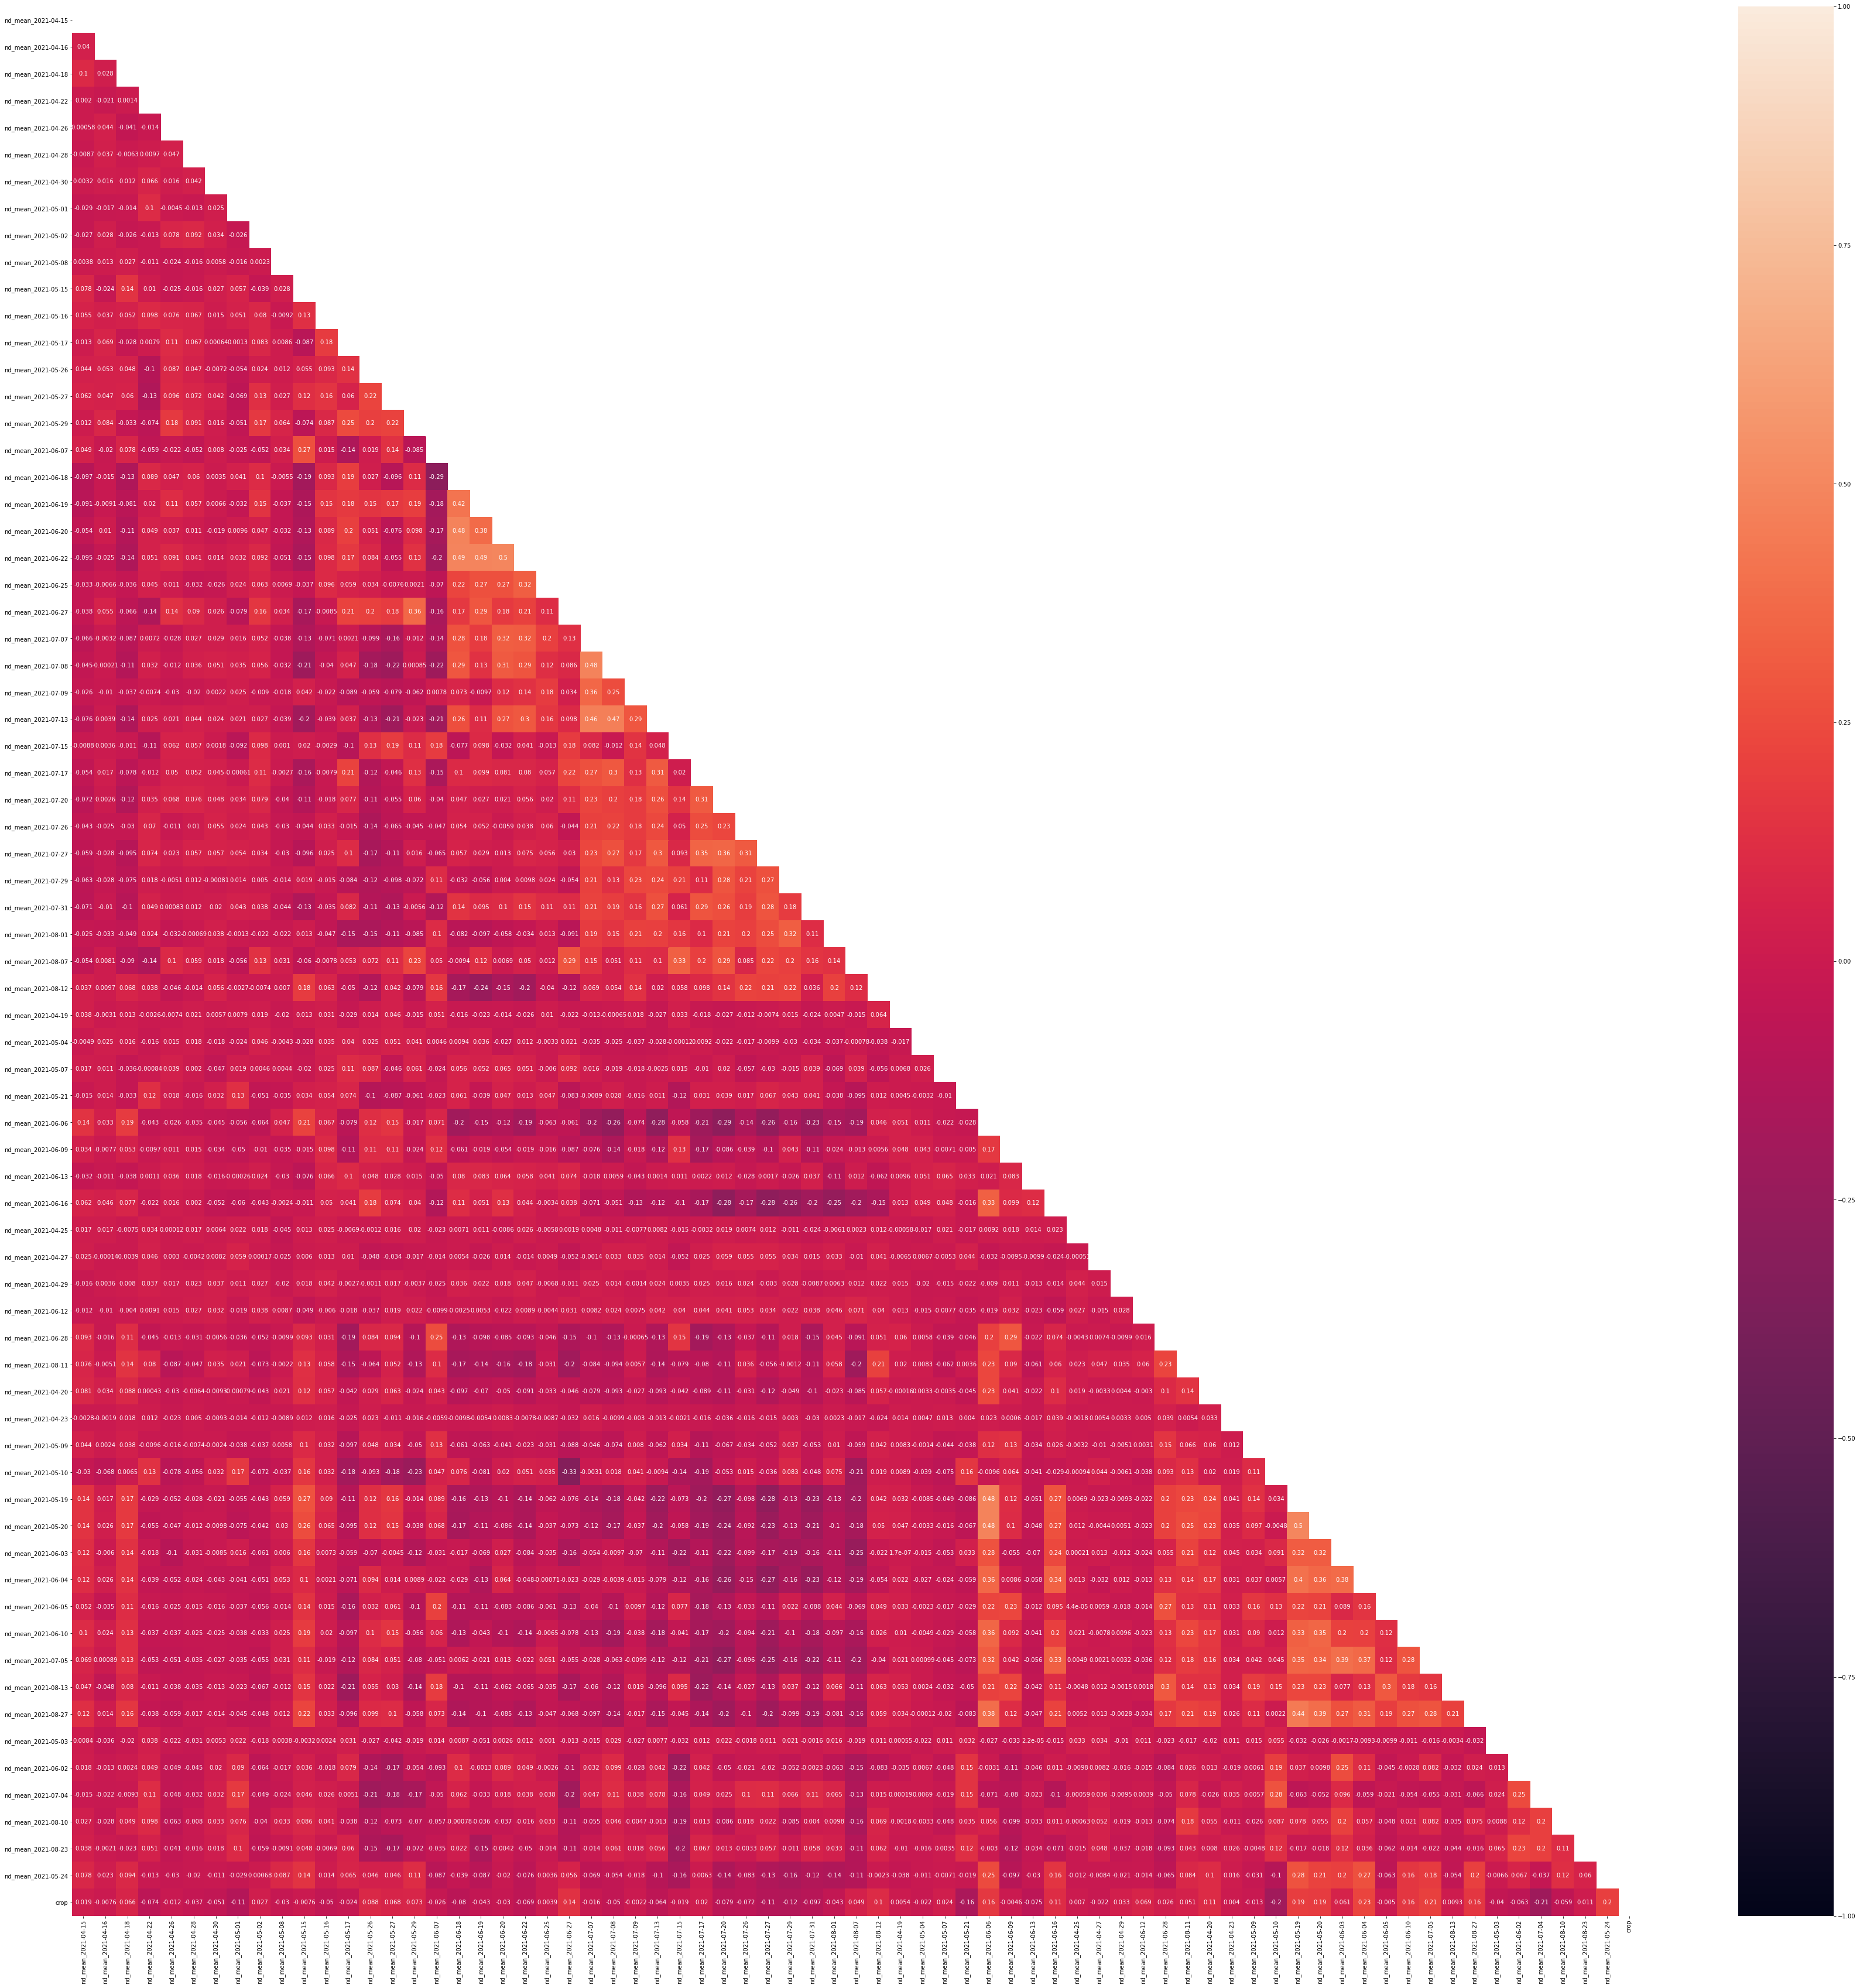

In [17]:
plt.rcParams['figure.figsize']=(60,60)
print('Corr matrix ')
mask = np.triu(df_n.corr())
sns.heatmap(df_n.corr(), center=0, annot=True, mask = mask, vmax=1, vmin=-1, cmap='rocket');

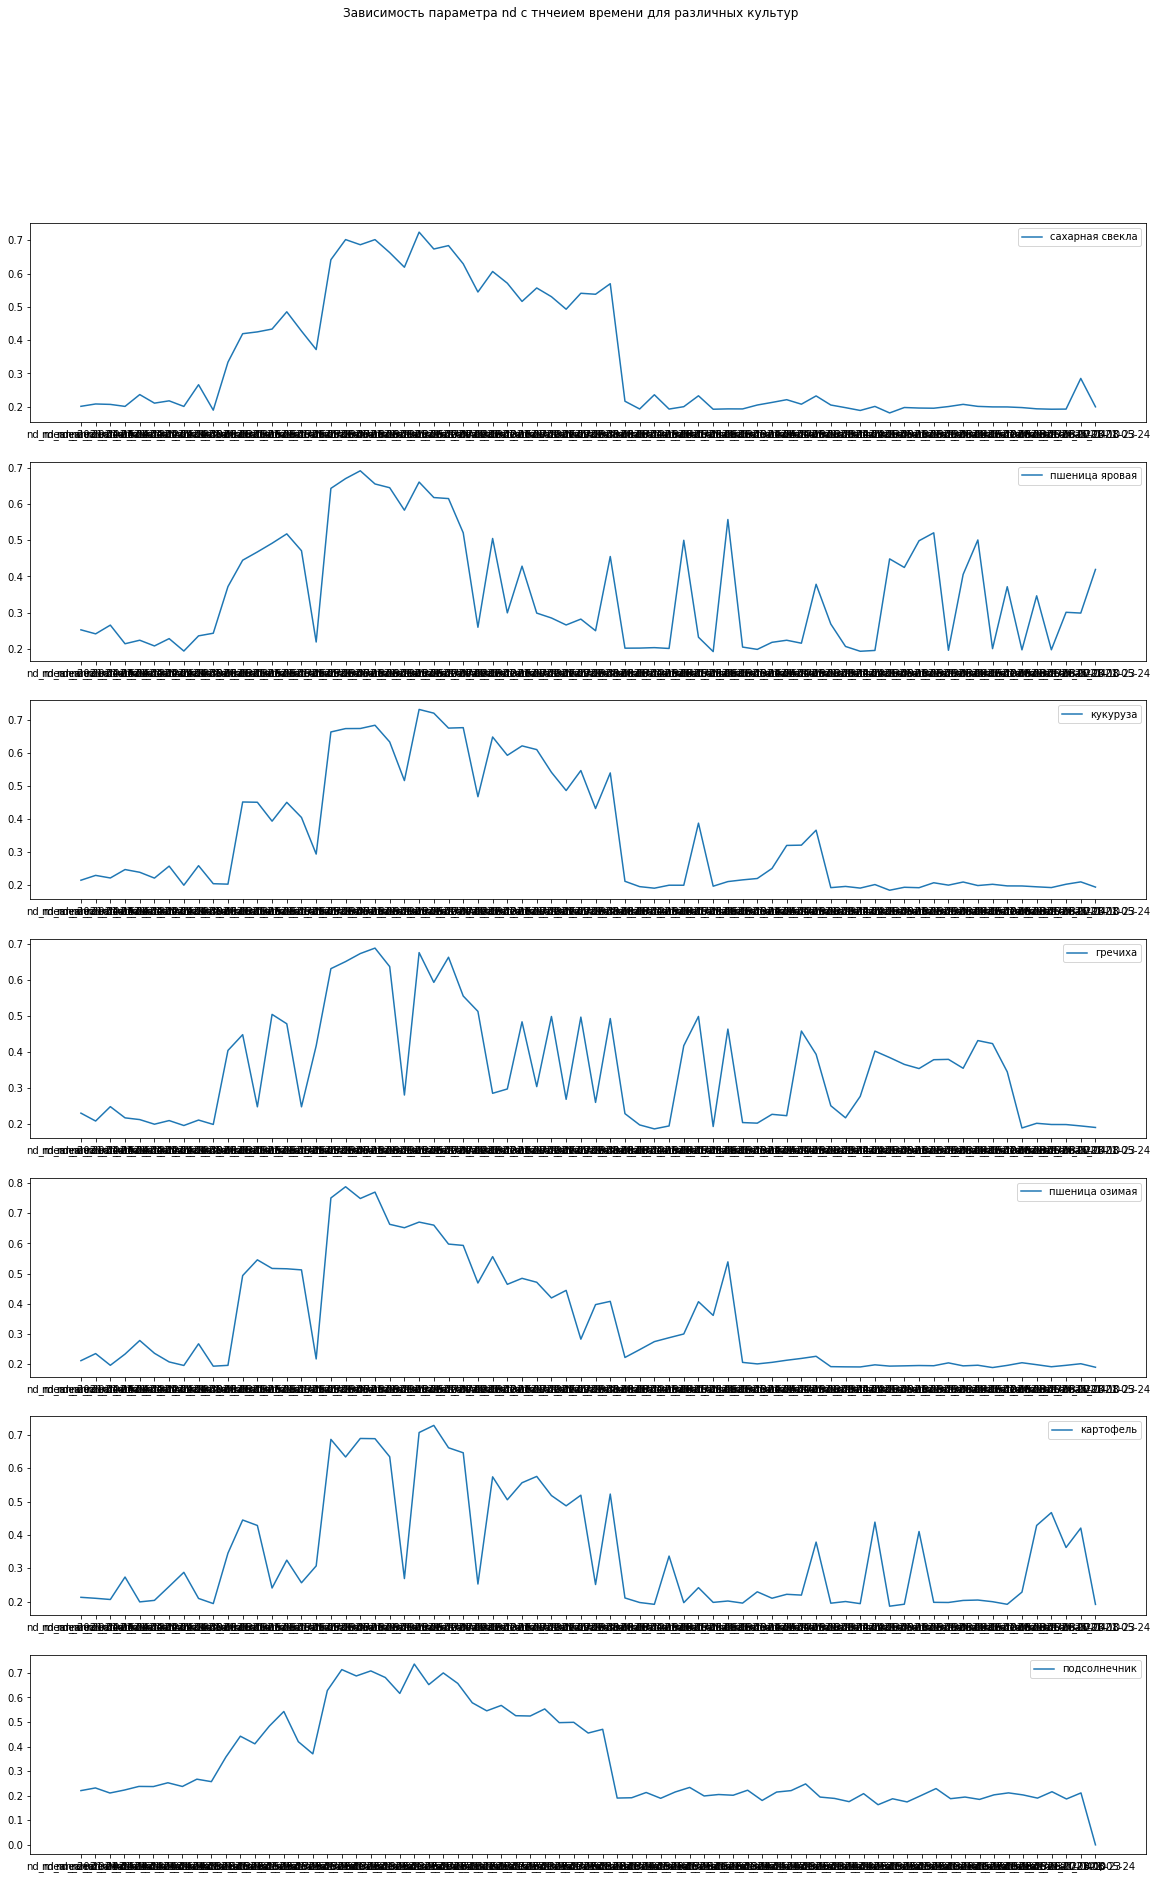

In [18]:
fig, axs = plt.subplots(7,1, figsize=(20, 30))

fig.suptitle('Зависимость параметра nd с тнчеием времени для различных культур')
a = df_n.loc[df_n['crop']==0][0:70].mean()
sns.lineplot(ax=axs[6], data=a);
axs[6].legend(['подсолнечник'], fontsize=10)

a = df_n.loc[df_n['crop']==1].mean()[0:70]
sns.lineplot(ax=axs[5], data=a);  
axs[5].legend(['картофель'], fontsize=10)

a = df_n.loc[df_n['crop']==2].mean()[0:70]
sns.lineplot(ax=axs[4], data=a)
axs[4].legend(['пшеница озимая'], fontsize=10); 

a = df_n.loc[df_n['crop']==3].mean()[0:70]
sns.lineplot(ax=axs[3], data=a);
axs[3].legend(['гречиха'], fontsize=10)

a = df_n.loc[df_n['crop']==4].mean()[0:70]
sns.lineplot(ax=axs[2], data=a);
axs[2].legend(['кукуруза'], fontsize=10)

a = df_n.loc[df_n['crop']==5].mean()[0:70]
sns.lineplot(ax=axs[1], data=a);
axs[1].legend(['пшеница яровая'], fontsize=10)

a = df_n.loc[df_n['crop']==6].mean()[0:70]
sns.lineplot(ax=axs[0], data=a);
axs[0].legend(['сахарная свекла'], fontsize=10);


In [19]:
corr_df = df_n.corr()
corr_df

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-04-30,nd_mean_2021-05-01,nd_mean_2021-05-02,nd_mean_2021-05-08,...,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-03,nd_mean_2021-06-02,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-05-24,crop
nd_mean_2021-04-15,1.000000,0.040185,0.099679,0.002046,0.000582,-0.008729,0.003240,-0.028677,-0.026905,0.003809,...,0.068683,0.047254,0.124735,0.008430,0.018500,-0.014543,0.027113,0.037792,0.078390,0.018915
nd_mean_2021-04-16,0.040185,1.000000,0.027869,-0.020971,0.043696,0.036785,0.016452,-0.017222,0.028384,0.012727,...,0.000886,-0.047934,0.013888,-0.035849,-0.013196,-0.021774,-0.028067,-0.002116,0.023078,-0.007633
nd_mean_2021-04-18,0.099679,0.027869,1.000000,0.001426,-0.041034,-0.006310,0.012162,-0.014382,-0.026491,0.027406,...,0.130853,0.079633,0.160133,-0.019917,0.002428,-0.009283,0.049257,-0.023323,0.093531,0.065636
nd_mean_2021-04-22,0.002046,-0.020971,0.001426,1.000000,-0.014105,0.009737,0.065602,0.103368,-0.013093,-0.011240,...,-0.053232,-0.010536,-0.037888,0.038058,0.049020,0.110340,0.097615,0.050994,-0.012621,-0.074198
nd_mean_2021-04-26,0.000582,0.043696,-0.041034,-0.014105,1.000000,0.046682,0.016393,-0.004490,0.077966,-0.023661,...,-0.051491,-0.038328,-0.059348,-0.021767,-0.048840,-0.048246,-0.062822,-0.041231,-0.030031,-0.011526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nd_mean_2021-07-04,-0.014543,-0.021774,-0.009283,0.110340,-0.048246,-0.032209,0.031760,0.172660,-0.049180,-0.023566,...,-0.055389,-0.031200,-0.065681,0.023712,0.245829,1.000000,0.199916,0.197077,-0.036831,-0.211779
nd_mean_2021-08-10,0.027113,-0.028067,0.049257,0.097615,-0.062822,-0.007971,0.033477,0.075648,-0.039521,0.032634,...,0.081510,-0.034533,0.075040,0.008835,0.119342,0.199916,1.000000,0.111946,0.124107,-0.059371
nd_mean_2021-08-23,0.037792,-0.002116,-0.023323,0.050994,-0.041231,-0.016150,0.017724,0.100873,-0.058987,-0.009128,...,-0.021557,-0.043946,-0.015691,0.064600,0.225649,0.197077,0.111946,1.000000,0.059805,0.010839
nd_mean_2021-05-24,0.078390,0.023078,0.093531,-0.012621,-0.030031,-0.020446,-0.011027,-0.028809,0.000679,0.086670,...,0.181698,-0.053633,0.199796,-0.006575,0.067391,-0.036831,0.124107,0.059805,1.000000,0.199961


In [20]:
print(f'The number of doubles {df_n[df_n.duplicated()].shape[0]} In our set {df.shape[0]}')
df_n.drop_duplicates(keep='first',inplace=True) # оставяем первый вариант
print(f'After deleted we have - {df_n.shape[0]} data/lines')

The number of doubles 0 In our set 4898
After deleted we have - 4898 data/lines


## Обучение Модели

In [21]:
y = df_n['crop'] # Зададим у вектор
X = df_n.drop('crop', axis=1) # зададим x матрицу признаков

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41, test_size=0.20)
X_train.shape, X_test.shape

((3918, 70), (980, 70))

In [23]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_predict_test = tree.predict(X_test)
tree_report = classification_report(y_test, tree_predict_test)
tree_a = round(accuracy_score(y_test, tree_predict_test)*100, ndigits=4)
print(f'Acyracity of DecisionTreeClassifier - {tree_a}\nClassification report - \n {tree_report}')

Acyracity of DecisionTreeClassifier - 69.2857
Classification report - 
               precision    recall  f1-score   support

         0.0       0.45      0.49      0.47       111
         1.0       0.82      0.82      0.82       146
         2.0       0.74      0.77      0.75       134
         3.0       0.75      0.75      0.75       137
         4.0       0.68      0.57      0.62       174
         5.0       0.85      0.84      0.85       157
         6.0       0.50      0.56      0.53       121

    accuracy                           0.69       980
   macro avg       0.68      0.69      0.68       980
weighted avg       0.70      0.69      0.69       980



In [24]:
random_tree_row = RandomForestClassifier(random_state=0, n_estimators = 3, n_jobs=-1)
random_tree_row.fit(X_train, y_train)
tree_predict_test = random_tree_row.predict(X_test)
tree_report = classification_report(y_test, tree_predict_test)
tree_a = round(accuracy_score(y_test, tree_predict_test)*100, ndigits=4)
print(f'Acyracity of DecisionTreeClassifier - {tree_a}\nClassification report - \n {tree_report}')

Acyracity of DecisionTreeClassifier - 66.4286
Classification report - 
               precision    recall  f1-score   support

         0.0       0.36      0.58      0.44       111
         1.0       0.71      0.90      0.79       146
         2.0       0.67      0.70      0.68       134
         3.0       0.83      0.80      0.81       137
         4.0       0.75      0.44      0.55       174
         5.0       0.95      0.77      0.85       157
         6.0       0.49      0.46      0.48       121

    accuracy                           0.66       980
   macro avg       0.68      0.66      0.66       980
weighted avg       0.70      0.66      0.67       980



In [25]:
param = {'n_estimators': [1000, 2000, 2400, 2600],
 'max_leaf_nodes': [80, 100, 140]}

gs = GridSearchCV(random_tree_row, param)
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=3, n_jobs=-1,
                                              random_state=0),
             param_grid={'max_leaf_nodes': [80, 100, 140],
                         'n_estimators': [1000, 2000, 2400, 2600]})

In [26]:
gs.best_params_

{'max_leaf_nodes': 140, 'n_estimators': 2600}

In [28]:


gs = GridSearchCV(random_tree_row, param)
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=3, n_jobs=-1,
                                              random_state=0),
             param_grid={'max_leaf_nodes': [80, 100, 140],
                         'n_estimators': [1000, 2000, 2400, 2600]})

In [29]:
gs.best_params_

{'max_leaf_nodes': 140, 'n_estimators': 2600}

In [30]:
param = {'n_estimators': [2600, 2700, 2550],
 'max_leaf_nodes': [150, 130, 140]}

gs = GridSearchCV(random_tree_row, param)
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_estimators=3, n_jobs=-1,
                                              random_state=0),
             param_grid={'max_leaf_nodes': [150, 130, 140],
                         'n_estimators': [2600, 2700, 2550]})

In [31]:
gs.best_params_

{'max_leaf_nodes': 150, 'n_estimators': 2700}

In [32]:
random_tree = RandomForestClassifier(n_estimators=2700, max_leaf_nodes=150, n_jobs=-1)
random_tree.fit(X_train, y_train)
tree_predict_test = random_tree.predict(X_test)
tree_report = classification_report(y_test, tree_predict_test)
tree_a = round(accuracy_score(y_test, tree_predict_test)*100, ndigits=4)
print(f'Acyracity of DecisionTreeClassifier - {tree_a}\nClassification report - \n {tree_report}')

Acyracity of DecisionTreeClassifier - 85.6122
Classification report - 
               precision    recall  f1-score   support

         0.0       0.61      0.83      0.70       111
         1.0       0.93      0.96      0.95       146
         2.0       0.84      0.90      0.87       134
         3.0       0.99      0.96      0.97       137
         4.0       0.86      0.74      0.79       174
         5.0       1.00      0.92      0.96       157
         6.0       0.75      0.68      0.71       121

    accuracy                           0.86       980
   macro avg       0.85      0.85      0.85       980
weighted avg       0.87      0.86      0.86       980



In [33]:
confusion_matrix(y_test, tree_predict_test)

array([[ 92,   0,   1,   0,   6,   0,  12],
       [  0, 140,   1,   0,   4,   0,   1],
       [  9,   0, 120,   1,   2,   0,   2],
       [  1,   0,   0, 132,   3,   0,   1],
       [ 19,   6,  10,   0, 128,   0,  11],
       [  1,   2,   8,   1,   0, 145,   0],
       [ 28,   2,   3,   0,   6,   0,  82]], dtype=int64)

In [34]:
my_recal = recall_score(y_test, tree_predict_test, average=None)
my_recal_avg = my_recal.sum()/len(my_recal)
my_recal_avg

0.8548062842021098

## Выводы
#### Показатель ND для разных культур в целом имет схожую тенденцию. Особенно сильно перекрываются, cахарная свекла картофель и подслонечник  что видно из графиков ND взависимости от времени и кореляционной матрицы.
#### Случайный лес показал наилучшее по сравнению с деревом принятия решение значение recall
#### Подобранные гиперпараметры случайного дерева помогли несколько улучшить метрики и разделение обьектов



### Предсказание 

In [35]:
test = pd.read_csv(r'C:\Users\Akami\Desktop\DataScience\данные\test_dataset_test.csv')

In [36]:
test_clean = test.drop(['id','area','.geo'], axis=1)
test_clean

,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-04-30,nd_mean_2021-05-01,nd_mean_2021-05-02,nd_mean_2021-05-08,...,nd_mean_2021-06-10,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-03,nd_mean_2021-06-02,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-05-24
0,0.570259,0.311567,0.158459,0.000000,0.410445,0.000000,0.268443,0.000000,0.125311,0.035183,...,0.112668,0.000000,0.508451,0.473916,0.000000,0.225841,0.000000,0.095615,0.000000,0.377496
1,0.099120,0.120262,0.058465,0.512710,0.498558,0.216236,0.419240,0.266971,0.442012,0.121951,...,0.011926,0.312531,0.000000,0.491863,0.295682,0.212321,0.143153,0.285811,0.089097,0.463397
2,0.284628,0.270622,0.306984,0.358121,0.171494,0.355236,0.265694,0.015629,0.309258,0.077885,...,0.000000,0.696087,0.381593,0.334549,0.130732,0.098730,0.000000,0.000000,0.000000,0.017715
3,0.000000,0.134871,0.031266,0.071576,0.265254,0.393184,0.288366,0.228679,0.022601,0.233839,...,0.378901,0.078180,0.260400,0.000000,0.000000,0.520998,0.105649,0.192649,0.039076,0.000000
4,0.274234,0.247413,0.334272,0.135544,0.053176,0.019014,0.337644,0.319347,0.434156,0.000000,...,0.218645,0.020747,0.000000,0.086551,0.000000,0.057502,0.188022,0.000000,0.074508,0.272411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,0.000000,0.260753,0.006954,0.120993,0.467033,0.445326,0.146015,0.063204,0.000000,0.066001,...,0.000000,0.223751,0.210844,0.517039,0.088939,0.241273,0.320513,0.086228,0.148027,0.027976
2096,0.218513,0.060567,0.285673,0.117278,0.056938,0.199099,0.015916,0.419855,0.120216,0.000000,...,0.000000,0.090219,0.014709,0.193550,0.483700,0.000000,0.735950,0.215911,0.718564,0.292793
2097,0.008660,0.222891,0.475024,0.507930,0.305147,0.360971,0.000000,0.300393,0.046327,0.273835,...,0.037657,0.000000,0.148410,0.283431,0.377793,0.400217,0.259843,0.062095,0.270994,0.523561
2098,0.026481,0.289413,0.249596,0.243610,0.183115,0.286295,0.141304,0.266499,0.237514,0.027361,...,0.155262,0.000000,0.315290,0.303863,0.000000,0.176415,0.287135,0.299178,0.224451,0.006830


In [37]:
y = random_tree.predict(test_clean)
y = pd.Series(y)
y


0       3.0
1       2.0
2       3.0
3       5.0
4       4.0
       ... 
2095    2.0
2096    1.0
2097    3.0
2098    0.0
2099    6.0
Length: 2100, dtype: float64

In [43]:
test['crop'] = y
test

,id,area,nd_mean_2021-04-15,nd_mean_2021-04-16,nd_mean_2021-04-18,nd_mean_2021-04-22,nd_mean_2021-04-26,nd_mean_2021-04-28,nd_mean_2021-04-30,nd_mean_2021-05-01,...,nd_mean_2021-07-05,nd_mean_2021-08-13,nd_mean_2021-08-27,nd_mean_2021-05-03,nd_mean_2021-06-02,nd_mean_2021-07-04,nd_mean_2021-08-10,nd_mean_2021-08-23,nd_mean_2021-05-24,crop
0,3961,15,0.570259,0.311567,0.158459,0.000000,0.410445,0.000000,0.268443,0.000000,...,0.000000,0.508451,0.473916,0.000000,0.225841,0.000000,0.095615,0.000000,0.377496,3.0
1,811,13,0.099120,0.120262,0.058465,0.512710,0.498558,0.216236,0.419240,0.266971,...,0.312531,0.000000,0.491863,0.295682,0.212321,0.143153,0.285811,0.089097,0.463397,2.0
2,2471,33,0.284628,0.270622,0.306984,0.358121,0.171494,0.355236,0.265694,0.015629,...,0.696087,0.381593,0.334549,0.130732,0.098730,0.000000,0.000000,0.000000,0.017715,3.0
3,3950,26,0.000000,0.134871,0.031266,0.071576,0.265254,0.393184,0.288366,0.228679,...,0.078180,0.260400,0.000000,0.000000,0.520998,0.105649,0.192649,0.039076,0.000000,5.0
4,414,33,0.274234,0.247413,0.334272,0.135544,0.053176,0.019014,0.337644,0.319347,...,0.020747,0.000000,0.086551,0.000000,0.057502,0.188022,0.000000,0.074508,0.272411,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,5201,26,0.000000,0.260753,0.006954,0.120993,0.467033,0.445326,0.146015,0.063204,...,0.223751,0.210844,0.517039,0.088939,0.241273,0.320513,0.086228,0.148027,0.027976,2.0
2096,5465,45,0.218513,0.060567,0.285673,0.117278,0.056938,0.199099,0.015916,0.419855,...,0.090219,0.014709,0.193550,0.483700,0.000000,0.735950,0.215911,0.718564,0.292793,1.0
2097,6640,48,0.008660,0.222891,0.475024,0.507930,0.305147,0.360971,0.000000,0.300393,...,0.000000,0.148410,0.283431,0.377793,0.400217,0.259843,0.062095,0.270994,0.523561,3.0
2098,2402,133,0.026481,0.289413,0.249596,0.243610,0.183115,0.286295,0.141304,0.266499,...,0.000000,0.315290,0.303863,0.000000,0.176415,0.287135,0.299178,0.224451,0.006830,0.0


In [41]:

PREPARED_DATASET_PATH = 'test2.csv'

test.to_csv(PREPARED_DATASET_PATH, index=False)

In [42]:
y.to_csv('y.csv')

In [57]:
fin = test[['id','crop']].copy
fin

<bound method NDFrame.copy of         id  crop
0     3961   3.0
1      811   2.0
2     2471   3.0
3     3950   5.0
4      414   4.0
...    ...   ...
2095  5201   2.0
2096  5465   1.0
2097  6640   3.0
2098  2402   0.0
2099  5078   6.0

[2100 rows x 2 columns]>

In [58]:
fin.to_csv('fin.csv')

AttributeError: 'function' object has no attribute 'to_csv'